In [11]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
df=pd.read_csv("/Users/ravina/Desktop/Air Conditioners.csv")

# Goal: our goal is to find out the best product at discount 👀👀

In [51]:
df.sample(2)

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
194,"Voltas 2 Ton 3 Star, Fixed Speed Split AC (Cop...",appliances,Air Conditioners,https://m.media-amazon.com/images/I/41M7ocgxan...,https://www.amazon.in/Voltas-Anti-dust-243-Vec...,NaN,NaN,"₹48,990","₹81,990"
358,Voltas 1.5 Ton Inverter 5 Star Split AC (185V ...,appliances,Air Conditioners,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Voltas-Inverter-Split-18...,NaN,NaN,NaN,NaN


In [52]:
df.sample(2).T

,225,258
name,FIDEL Tafta Heavy Duty Air Conditioner Outdoor...,Voltas 1.5 Ton 3 Star Adjustable Inverter Copp...
main_category,appliances,appliances
sub_category,Air Conditioners,Air Conditioners
image,https://m.media-amazon.com/images/W/IMAGERENDE...,https://m.media-amazon.com/images/W/IMAGERENDE...
link,https://www.amazon.in/FIDEL-Tafta-Conditioner-...,https://www.amazon.in/Voltas-Adjustable-Invert...
ratings,3.6,3.5
no_of_ratings,26,13
discount_price,₹699,"₹35,990"
actual_price,"₹1,499","₹59,990"


In [53]:
#finding the null values if any
df.isna().sum() #or df.isnull().sum()

name                0
main_category       0
sub_category        0
image               0
link                0
ratings           287
no_of_ratings     287
discount_price    263
actual_price      220
dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            720 non-null    object
 1   main_category   720 non-null    object
 2   sub_category    720 non-null    object
 3   image           720 non-null    object
 4   link            720 non-null    object
 5   ratings         433 non-null    object
 6   no_of_ratings   433 non-null    object
 7   discount_price  457 non-null    object
 8   actual_price    500 non-null    object
dtypes: object(9)
memory usage: 50.8+ KB


In [55]:
df.describe()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
count,720,720,720,720,720,433,433,457,500
unique,708,1,1,635,720,31,187,295,296
top,Samsung 1.5 Ton 3 Star Wind-Free Technology In...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.0,1,"₹39,990","₹59,990"
freq,3,720,720,6,1,56,45,11,15


In [56]:
#droping the colum with more than 70% of missing data 
perc=70
min_count=int(((100-perc)/100)*df.shape[1]+1)
final_df=df.dropna(axis=1,thresh=min_count)

In [57]:
final_df.head(2)

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"


In [58]:
final_df.shape

(720, 9)

In [59]:
# final_df==df #checking if final_df is same as df

In [60]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            720 non-null    object
 1   main_category   720 non-null    object
 2   sub_category    720 non-null    object
 3   image           720 non-null    object
 4   link            720 non-null    object
 5   ratings         433 non-null    object
 6   no_of_ratings   433 non-null    object
 7   discount_price  457 non-null    object
 8   actual_price    500 non-null    object
dtypes: object(9)
memory usage: 50.8+ KB


# let's clean the datatype of the integer columns
here the numerical columns ratings, no_of_ratings and discount price have object data type but we 
want to have it as int or float therefore let's change it to the correct datatype.



In [61]:
# removing the rupees sign 
final_df['discount_price']=final_df['discount_price'].str.split(" ",expand=True).get(0).str.split("₹",expand=True).get(1)
final_df['actual_price']=final_df['actual_price'].str.split(" ",expand=True).get(0).str.split("₹",expand=True).get(1)

In [62]:
#change the comma to dot and chnge the type to float
final_df['discount_price']=final_df['discount_price'].str.replace(',','').astype(float)
final_df["actual_price"] = final_df["actual_price"].str.replace(',', '').astype(float)

In [63]:
final_df['ratings'].unique()

array(['4.2', '4.0', '4.1', '4.3', '3.9', '3.8', '3.5', nan, '4.6', '3.3',
       '3.4', '3.7', '2.9', '5.0', '4.4', '3.6', '2.7', '4.5', '3.0',
       '3.1', '3.2', '4.8', '4.7', '2.5', '1.0', '2.6', '2.8', '2.3',
       '1.7', 'Get', '1.8', '2.4'], dtype=object)

In [64]:
#final_df['ratings']

In [65]:
final_df['ratings']=final_df['ratings'].replace(['Get'],'0.0')
final_df['ratings'].fillna(0.0, inplace=True)
final_df['ratings']=final_df['ratings'].astype(float)

final_df['ratings'].unique()

array([4.2, 4. , 4.1, 4.3, 3.9, 3.8, 3.5, 0. , 4.6, 3.3, 3.4, 3.7, 2.9,
       5. , 4.4, 3.6, 2.7, 4.5, 3. , 3.1, 3.2, 4.8, 4.7, 2.5, 1. , 2.6,
       2.8, 2.3, 1.7, 1.8, 2.4])

In [66]:
final_df['ratings'].dtype

dtype('float64')

In [67]:
final_df["no_of_ratings"].unique()

array(['2,255', '2,948', '1,206', '69', '630', '1,666', '1,097', '1,494',
       '674', '801', '558', '730', '5,073', '568', '3,670', '312', '88',
       '432', '268', '2', '700', '540', '258', '2,178', nan, '1,444',
       '360', '38', '1,208', '341', '3', '15', '925', '3,604', '42', '22',
       '94', '1,866', '292', '1,830', '8', '536', '201', '2,722', '202',
       '23', '1,195', '5', '66', '474', '502', '686', '1,183', '56', '1',
       '49', '212', '79', '468', '317', '45', '142', '451', '145', '265',
       '3,157', '274', '39', '178', '655', '81', '43', '234', '134', '97',
       '229', '12', '748', '926', '62', '14', '440', '85', '260', '118',
       '172', '387', '195', '7', '158', '9', '10', '1,295', '16', '303',
       '120', '55', '27', '34', '37', '1,573', '29', '6', '112', '200',
       '11', '121', '886', '209', '4', '207', '622', '31', '192', '40',
       '101', '96', '70', '259', '1,400', '288', '13', '51', '175', '114',
       '567', '187', '21', '1,832', '563', '24'

In [68]:
# Convert non-numeric values to NaN
final_df['no_of_ratings'] = pd.to_numeric(final_df['no_of_ratings'], errors='coerce')

# Replace NaN values with the median
median_value = final_df['no_of_ratings'].median()
final_df['no_of_ratings'].fillna(median_value, inplace=True)


In [69]:
final_df['no_of_ratings'] = final_df['no_of_ratings'].replace(['Only 2 left in stock.','Only 1 left in stock.'],'med')



In [70]:

final_df['no_of_ratings'].unique()

array([ 16.,  69., 630., 674., 801., 558., 730., 568., 312.,  88., 432.,
       268.,   2., 700., 540., 258., 360.,  38., 341.,   3.,  15., 925.,
        42.,  22.,  94., 292.,   8., 536., 201., 202.,  23.,   5.,  66.,
       474., 502., 686.,  56.,   1.,  49., 212.,  79., 468., 317.,  45.,
       142., 451., 145., 265., 274.,  39., 178., 655.,  81.,  43., 234.,
       134.,  97., 229.,  12., 748., 926.,  62.,  14., 440.,  85., 260.,
       118., 172., 387., 195.,   7., 158.,   9.,  10., 303., 120.,  55.,
        27.,  34.,  37.,  29.,   6., 112., 200.,  11., 121., 886., 209.,
         4., 207., 622.,  31., 192.,  40., 101.,  96.,  70., 259., 288.,
        13.,  51., 175., 114., 567., 187.,  21., 563.,  24., 769., 542.,
       297., 329.,  20., 156.,  26., 485., 302., 255., 169., 224.,  25.,
       449., 218., 913., 373., 776.,  60.,  54.,  19.,  74.,  17., 213.,
       430., 591., 247.,  41., 222.,  71., 290.,  65.,  18.,  32., 130.,
       416.,  64., 119.,  59.,  68.,  36., 164.,  7

In [71]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            720 non-null    object 
 1   main_category   720 non-null    object 
 2   sub_category    720 non-null    object 
 3   image           720 non-null    object 
 4   link            720 non-null    object 
 5   ratings         720 non-null    float64
 6   no_of_ratings   720 non-null    float64
 7   discount_price  457 non-null    float64
 8   actual_price    500 non-null    float64
dtypes: float64(4), object(5)
memory usage: 50.8+ KB


In [72]:
final_df.head(2)

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,16.0,32999.0,58990.0
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,16.0,46490.0,75990.0


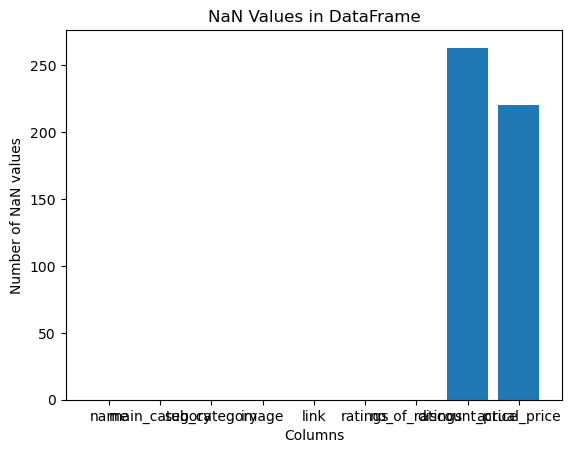

In [73]:
# plot the total missing values 
x = final_df.isna().sum()

# Convert the index (column names) to a list
categories = x.index.tolist()

# Create a bar plot
plt.bar(categories, x)

# Add labels and title
plt.xlabel('Columns')
plt.ylabel('Number of NaN values')
plt.title('NaN Values in DataFrame')

# Show the plot
plt.show()

# now let's brows to the amazon website and the order of the things i checked with respect to a product are:
1. price
2. ratings
3. provider
4. description and 
5. customer review
let's analyze the given dtaframe on the considered points

In [74]:
#following is the dta frame of missing ratings

missing_price=final_df[final_df['actual_price'].isnull()]
missing_price.head(2)


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
76,LG 1.5 Ton 3 Star Hot & Cold DUAL Inverter Spl...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51hbo8yQ1E...,https://www.amazon.in/LG-Inverter-Convertible-...,4.0,265.0,NaN,NaN
100,Hitachi 1.5 Ton 5 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41AY1pk5oR...,https://www.amazon.in/Hitachi-Inverter-Copper-...,3.8,748.0,NaN,NaN


In [75]:
#we can't analyze further due to the non availablity of the price for above devices, let's drop these entries
df=final_df.dropna(subset=['actual_price','discount_price'])
df.head(2)

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,16.0,32999.0,58990.0
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,16.0,46490.0,75990.0


# Extract the manufacturer from the 'name' column
Extract the manufacturer from the 'name' column and insert the 'manufacturer' column after the 'name' column. To do this, we convert the 'name' column (type 'Series') into a string, split by spaces and select the first substring. We will have some incorrect names (such as 'The', 'Van', etc.) for brands which names consists of more than one word. But for many others it is okay. And I think this is enought to obtain general understanding for our purposes.

In [76]:
df['manufacturer'] = df['name'].str.split(' ').str[0]
cols = df.columns.tolist()
cols


/var/folders/3t/5qtlv2451k3fkqv9ls22lmg00000gn/T/ipykernel_4021/2224828226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['manufacturer'] = df['name'].str.split(' ').str[0]


['name',
 'main_category',
 'sub_category',
 'image',
 'link',
 'ratings',
 'no_of_ratings',
 'discount_price',
 'actual_price',
 'manufacturer']

In [77]:
cols = ['name',
 'manufacturer',
 'main_category',
 'sub_category',
 'image',
 'link',
 'ratings',
 'no_of_ratings',
 'discount_price',
 'actual_price']

In [78]:
df = df[cols]
df.head(2)

,name,manufacturer,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,Lloyd,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,16.0,32999.0,58990.0
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,LG,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,16.0,46490.0,75990.0


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457 entries, 0 to 715
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            457 non-null    object 
 1   manufacturer    457 non-null    object 
 2   main_category   457 non-null    object 
 3   sub_category    457 non-null    object 
 4   image           457 non-null    object 
 5   link            457 non-null    object 
 6   ratings         457 non-null    float64
 7   no_of_ratings   457 non-null    float64
 8   discount_price  457 non-null    float64
 9   actual_price    457 non-null    float64
dtypes: float64(4), object(6)
memory usage: 39.3+ KB


In [80]:
# Make column with discount net value and discounting percent 
df['discount_value'] = df['actual_price'] - df['discount_price']
df['discounting_percent'] = 1 - df['discount_price']/df['actual_price']

In [81]:
df.head(2)

,name,manufacturer,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,discount_value,discounting_percent
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,Lloyd,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,16.0,32999.0,58990.0,25991.0,0.440600
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,LG,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,16.0,46490.0,75990.0,29500.0,0.388209


In [82]:
df[["actual_price", 'manufacturer']].groupby("manufacturer").mean().round(2).sort_values(by = "actual_price",
                                                                    ascending = False)


,actual_price
manufacturer,
MEGACOOL,124500.0
Voltas Venture i Cassette 3Ph Scroll SAC(C2-N),120490.0
iMee-1.5,89999.0
MITSUBISHI,83000.0
2.0,73750.0
...,...
ThreeH,1449.0
QAWACHH,1399.0
Hexzone®,1349.0


In [83]:
# Detail of the maximum price row
df[df["actual_price"] == df["actual_price"].max()]

,name,manufacturer,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,discount_value,discounting_percent
460,Voltas 3Ph Scroll SAC C2-NVenture I-Cassette A...,Voltas,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31lyjrJOXs...,https://www.amazon.in/Voltas-Scroll-SAC-C2-NVe...,5.0,2.0,128800.0,149000.0,20200.0,0.13557


In [84]:
# Detail of the minimum price row
df[df["discount_value"] == df["discount_value"].min()]

,name,manufacturer,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,discount_value,discounting_percent
187,ThreeH USB Fan Silent Mini Air Conditioner Tra...,ThreeH,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31c+t5O9dP...,https://www.amazon.in/ThreeH-Conditioner-Handh...,4.0,16.0,1219.0,1449.0,230.0,0.15873


In [105]:
# Let us check the common manufacture
values = df["manufacturer"].unique().tolist()[:10]
values

['Lloyd',
 'LG',
 'Carrier',
 'Voltas',
 'Daikin',
 'Panasonic',
 'Whirlpool',
 'Samsung',
 'Godrej',
 'Blue']

In [106]:
counts = df["manufacturer"].value_counts().tolist()[:10]
counts

[64, 52, 37, 35, 31, 24, 23, 22, 14, 13]

<BarContainer object of 10 artists>

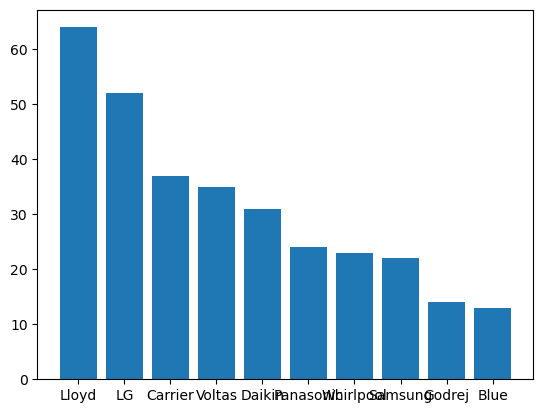

In [107]:
plt.bar(values,counts,figsize=(10,8))

In [109]:
# Lloyd is manufacturing most of the airconditioners